# Chapter 6 - ex8: Area plot, Boxplot
## Part 1: Area Plot
- Cho Dữ liệu Số giờ nắng các tháng trong năm 2016, 2017 tại trạm quan trắc Vũng tàu:
- Trên cùng một biểu đồ, hãy vẽ:
    - Area plot cho 12 tháng nắng trong năm 2016
    - Line plot cho 12 tháng nắng trong năm 2017

## Part 2: Boxplot
- Cho dữ liệu baseball.csv
- Vẽ boxplot cho dữ liệu trên
- Kiểm tra xem dữ liệu có outliers hay không? Nếu có thì loại bỏ các outliers. Vẽ lại boxplot

## Part 1: Area Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(
    {
        'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'Hours_2017': [183.4, 211.8, 286.4, 287.5, 238.8, 200.3, 187.4, 233.8, 225.5, 149.1, 180.2,198.3],
        'Hours_2016': [272.8, 254.0, 296.0, 298.0, 240.1, 197.8, 240.3, 219.5, 212.7, 134.7, 215.3, 109.1]        
    }
)

In [3]:
df.head()

,Month,Hours_2017,Hours_2016
0,1,183.4,272.8
1,2,211.8,254.0
2,3,286.4,296.0
3,4,287.5,298.0
4,5,238.8,240.1


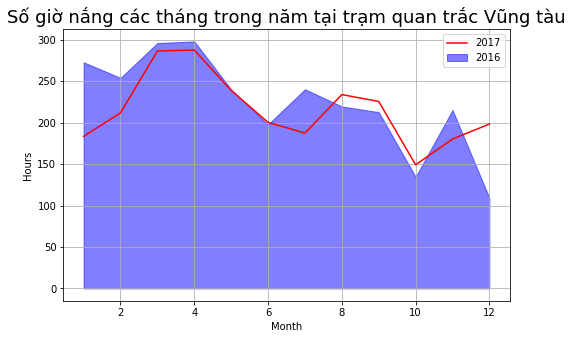

In [4]:
plt.figure(figsize=(8,5))
plt.fill_between(df.Month, df.Hours_2016, color='blue', label = '2016', alpha=0.5)
plt.plot(df.Month, df.Hours_2017,color='red', label='2017')

plt.title("Số giờ nắng các tháng trong năm tại trạm quan trắc Vũng tàu", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Hours")
plt.legend()
plt.grid(True)
plt.show()

## Part 2: Boxplot

In [5]:
data = pd.read_csv("baseball.csv", index_col=0)
data.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


In [6]:
data.describe()

,height,weight
count,1015.000000,1015.000000
mean,1.871717,91.330191
std,0.058774,9.445198
min,1.701800,68.038800
25%,1.828800,84.368112
50%,1.879600,90.718400
75%,1.905000,97.522280
max,2.108200,131.541680


### Boxplot

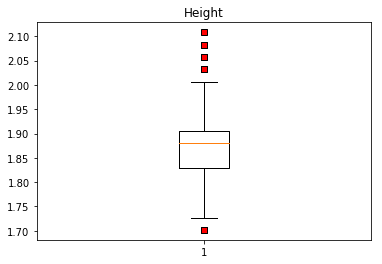

In [7]:
red_square = dict(markerfacecolor = 'r', marker = 's')
height = plt.boxplot(data.height, flierprops=red_square)
plt.title("Height")
plt.show()

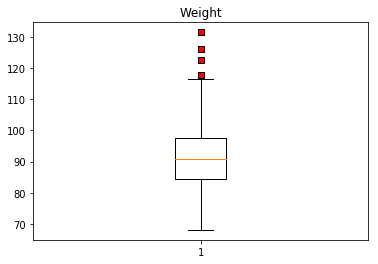

In [8]:
weight = plt.boxplot(data.weight, flierprops=red_square)
plt.title('Weight')
plt.show()

### Find, count, remove outliers

In [9]:
data.shape

(1015, 2)

In [10]:
# height
Q1_H = data.height.quantile(0.25)
Q3_H = data.height.quantile(0.75)
IQR_H = Q3_H - Q1_H
print(IQR_H)

0.07620000000000005


In [11]:
H_lower_bound = Q1_H - (1.5 * IQR_H) 
H_upper_bound = Q3_H + (1.5 * IQR_H) 
H_lower_bound 

1.7145

In [12]:
H_upper_bound

2.0193000000000003

In [13]:
count_H_upper_ouliters = data.height[data.height > H_upper_bound].count()
count_H_upper_ouliters

10

In [14]:
count_H_lower_ouliters =  data.height[data.height < H_lower_bound].count() 
count_H_lower_ouliters

2

In [15]:
# weight
Q1_W = data.weight.quantile(0.25)
Q3_W = data.weight.quantile(0.75)
IQR_W = Q3_W - Q1_W
print(IQR_W)

13.154168000000013


In [16]:
W_lower_bound = Q1_W - (1.5 * IQR_W) 
W_upper_bound = Q3_W + (1.5 * IQR_W) 
W_lower_bound 

64.63685999999998

In [17]:
W_upper_bound

117.25353200000004

In [18]:
count_W_upper_ouliters = data.weight[data.weight > W_upper_bound].count()
count_W_upper_ouliters

7

In [19]:
count_W_lower_ouliters =  data.weight[data.weight < W_lower_bound].count() 
count_W_lower_ouliters

0

In [20]:
#drop outliers
result = data
result.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


In [21]:
result = result.drop(result[result.height < H_lower_bound].index)
result = result.drop(result[result.height > H_upper_bound].index)
result = result.drop(result[result.weight < W_lower_bound].index)
result = result.drop(result[result.weight > W_upper_bound].index)

In [22]:
data.shape

(1015, 2)

In [23]:
result.shape

(998, 2)

### boxplot again

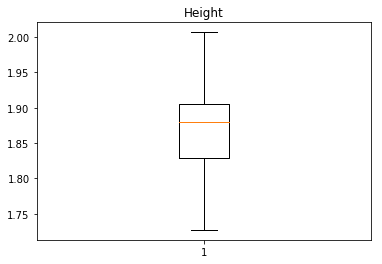

In [24]:
# height
height = plt.boxplot(result.height, flierprops=red_square)
plt.title("Height")
plt.show()

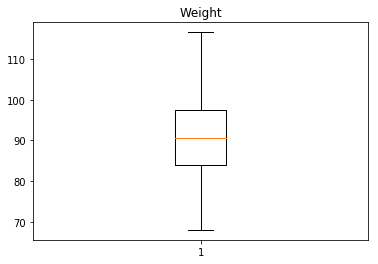

In [25]:
weight = plt.boxplot(result.weight, flierprops=red_square)
plt.title('Weight')
plt.show()